## Testing the impact of antecedent conditions on ReFH2 loss removal for observed events 

#### <ins> Part 1: How does the removal of losses in observed events compare to the removal of losses for design events? </ins>
When design events are produced in ReFH2, no antecedent conditions need to be provided; whereas, when observed events are provided to ReFH2 then antecedent conditions are needed to allow subtraction of losses from the observed event. We are interested in comparing the loss removal when an event is initially generated as a design event, and the loss removal when it is considered as an observed event.


* A 6hr, 100 year return period was created in ReFH2.
* This returns the design rainfall each minute for the event, and the rainfall each minute after losses have been removed
* The design rainfall (pre-loss removal) from this event was then fed back into ReFH2 as an observed event
* A variety of antecedent conditions were applied  
* The post loss removal profiles were compared, allowing identification of which antecedent conditions result in the most similar profile to the inbuilt loss removal process in ReFH2.

* When design events are produced in ReFH2, no antecedent conditions need to be provided; whereas, when observed events are provided to ReFH2 then antecedent conditions are needed to allow subtraction of losses from the observed event. 
* We are interested in comparing the loss removal when an event is initially generated as a design event, and the loss removal when it is considered as an observed event.

#### <ins> Part 2: How much difference do the antecedent conditions make? </ins>
* The same synthetic rainfall events were fed into ReFH2 multiple times, each time using different antecedent conditions.  
* The results were compared to investigate how much difference there is in the total rainfall volume and peak rainfall rate after loss removal depending on the antecedent conditions supplied

#### <ins> Defining antecedent conditions </ins>

The antecedent conditions were found by calculating statistics on daily rainfall for the grid cells covering the catchment in the CEH-GEAR 1km gridded observations. These statistics were calculated over both the whole year, or just JJA:

* The mean rainfall for the catchment (1.78mm whole year; 0.51mm JJA) 
* The 25th percentile rainfall for the catchment (0mm whole year and JJA) 
* The 50th percentile rainfall for the catchment (0.1mm whole year; 0mm JJA) 
* The 90th percentile rainfall for the catchment (5.4mm whole year; 0.4mm JJA) 
* The 95th percentile rainfall for the catchment (8.6mm whole year; 2.9mm JJA) 
* The 99th percentile rainfall for the catchment (18.3mm whole year; 11.9mm JJA) 

In ReFH2 antecedent conditions can be supplied for between 3 and 365 days. Tests were made of application over:
* 4 days previous to the event
* 15 days previous to the event
* 365 days previous to the event


<!-- SURELY APPLYING THE SAME RAINFALL RATE FOR 365 DAYS BEFORE THE EVENT WOULD HAVE MASSIVE EFFEFCT??? -->

<!-- ### General results 
The <ins>wetter</ins> the antecedent conditions then the <ins> higher </ins> the net rainfall:
* Wetter antecedent conditions --> 
<!-- * A more saturated catchment with less ability to absorb water --> 
<!-- * Less subtraction of losses from the incident rainfall --> 
<!-- * A higher net rainfall -->

<!-- For the 97th percentile, the lengh of time the antecedent conditions are applied for makes no difference. This might be because supplying this level of rainfall for just one day (or upt o 3 days) already causes the catchment to be saturated.  -->

<!-- However, for the mean, the longer the antecedent conditions are supplied for then the lower the net rainfall. Lower net rainfall means that more losses have been subtracted, which suggests a drier catchment. Maybe in this case this is because the mean rainfall is lower than the rainfall amount that would be specified in the background?? -->

<!-- * Longer antecedent rainfall period - More losses removed  Drier catchment -
* Shorter antecedent rainfall period - Less losses removed  Wetter catchment - -->

#### Code initialisation

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import matplotlib.patches as mpatches
import numpy as np
from datetime import datetime, timedelta

from Functions import * 

total_duration_minutes = 361

In [31]:
# Convert the strings to the daily rainfall values they represent
dict_of_values = {'wholeyear/95thP': 8.6, 'wholeyear/99thP':18.3, 'wholeyear/mean':1.78,
                  'jja/95thP': 2.9, 'jja/99thP':11.9, 'jja/mean':0.51}  

### <ins> Part 1: How does the removal of losses in observed events compare to the removal of losses for design events? </ins>

These plots compare the rainfall post-loss removal using 15 days of antecedent conditions based on the mean, P95 and P99 from either JJA (left) or the whole year (right).  

This shows the JJA P95 - 2.9mm - is the closest to the ReFH2 in built loss removal process on design events

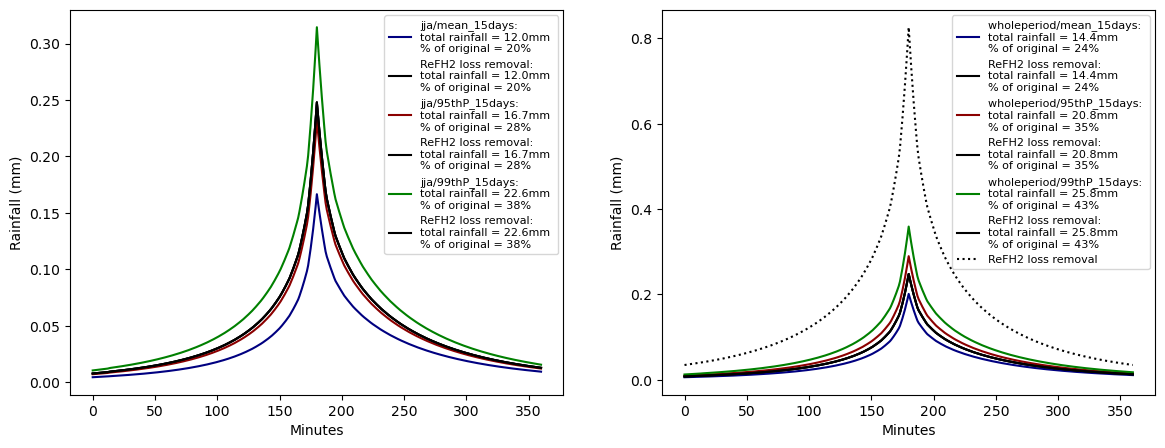

In [12]:
# jja values are = [0.51,  2.9, 11.9]
options1 = ['jja/mean_15days',  'jja/95thP_15days', 'jja/99thP_15days']
# wholeperiod values are = [1.78, 8.6, 18.3]
options2 = ['wholeperiod/mean_15days', 'wholeperiod/95thP_15days', 'wholeperiod/99thP_15days']

cols = ['navy', 'darkred', 'green']
fig, axs = plt.subplots(1,2,  figsize = (14,5))
singlepeak_plot(axs[0],options1, cols, False)
singlepeak_plot(axs[1], options2,cols, True)
singlepeak_plot(axs[3],options, cols, False, True)

As JJA P95 is closest to the ReFH2 inbuilt process, additional tests on whether applying this statistic over different periods are carried out.

These plots compare the rainfall post loss removal using the the JJA P95 over 4, 15 and 365 days. The right hand plot also includes the rainfall rate pre-loss removal.

This shows that applying the JJA P95 over 4 days is closest to the ReFH2.

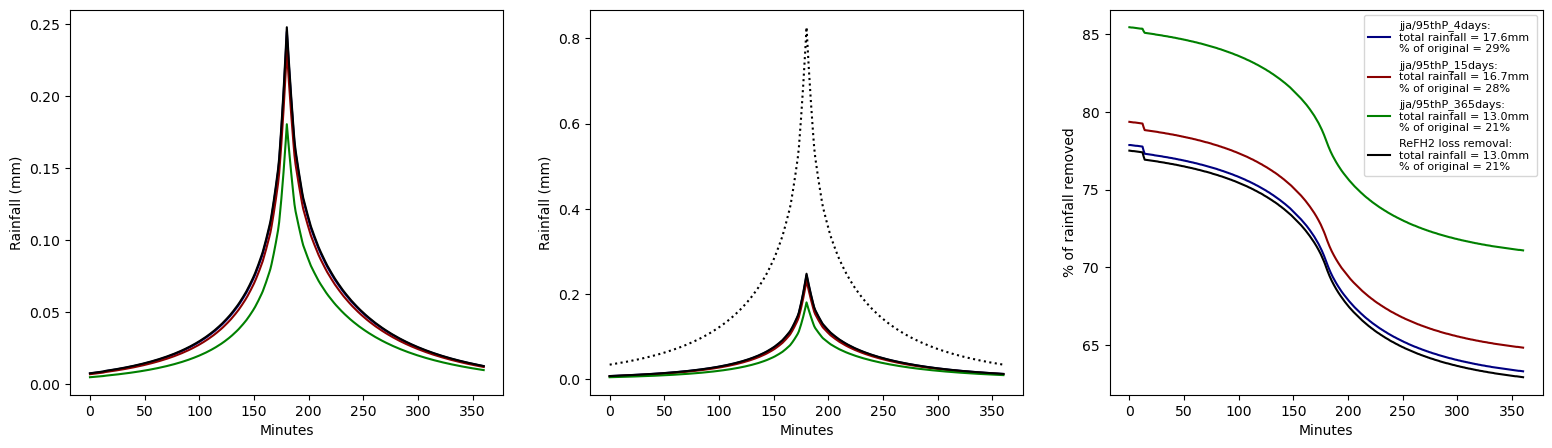

In [74]:
options = ['jja/95thP_4days','jja/95thP_15days', 'jja/95thP_365days' ]
cols = ['navy', 'darkred', 'green']
fig, axs = plt.subplots(1, 3, figsize = (19,5))
singlepeak_plot(axs[0],options, cols, False, False)
singlepeak_plot(axs[1], options,cols, True, False)
singlepeak_plot(axs[2],options, cols, False, True)

### <ins> Part 2: How much difference do the antecedent conditions make? </ins>

<ins>Logic</ins>:
* Antecedent conditions can be supplied to ReFH2 for 3-365 days. 
* How much difference will the number of days of antecedent data supplied to ReFH2 make to resulting net rainfall rate?
* How much difference will the magnitude of the daily rainfall supplied to ReFH2 make to resulting net rainfall rate?

<ins>Method</ins>:
* The net rainfall rate after removal of losses are compared for:
    * Different antecedent daily wetness values
    * Applied on each day for 4, 15 and 365 days before onset of the event being modelled.  

<ins>Results</ins>:    
* Wetter antecedent conditions -> smaller loss removal (catchment is initially more saturated) 
* Longer antecedent conditions -> Greater difference in net rainfall rate between wetter and drier antecedent conditions.  

<ins>Results</ins>:
* 50thP - highest net rainfall for 4/15 days, lower rate for 365 days
* Mean - highest net rainfall for 15/365 days, very marginally lower rate for 4 days 
* 90thP - highest net rainfall for 15/365 days, lower rate for 4 days
* 95thP - highest net rainfall for 15/365 days, lower rate for 4 days

<ins>Conclusions</ins>:
* A higher net rainfall rate means that fewer losses have been subtracted which suggests that the catchment is initially wetter.
* For a lower rainfall rate (50th percentile) supplying more days of antecedent data results in a lower net rainfall rate, whereas for higher rainfall rates (mean, 90th/95th percentiles) supplying more days of antecedent data leads to a higher net rainfall rate
* This suggests that where only a few days of data are given, ReFH2 will use some other internal calculations of antecedent conditions, and that the assumptions made in this will result in a wetter catchment than the 50th percentile, a similarly wet catchment to the mean, and a drier catchment than higher percentiles.  

In [5]:
# Convert the strings to the daily rainfall values they represent
dict_of_values = {'wholeyear/95thP': 8.6, 'wholeyear/99thP':18.3, 'wholeyear/mean':1.78,
                  'jja/95thP': 2.9, 'jja/99thP':11.9, 'jja/mean':0.51}  

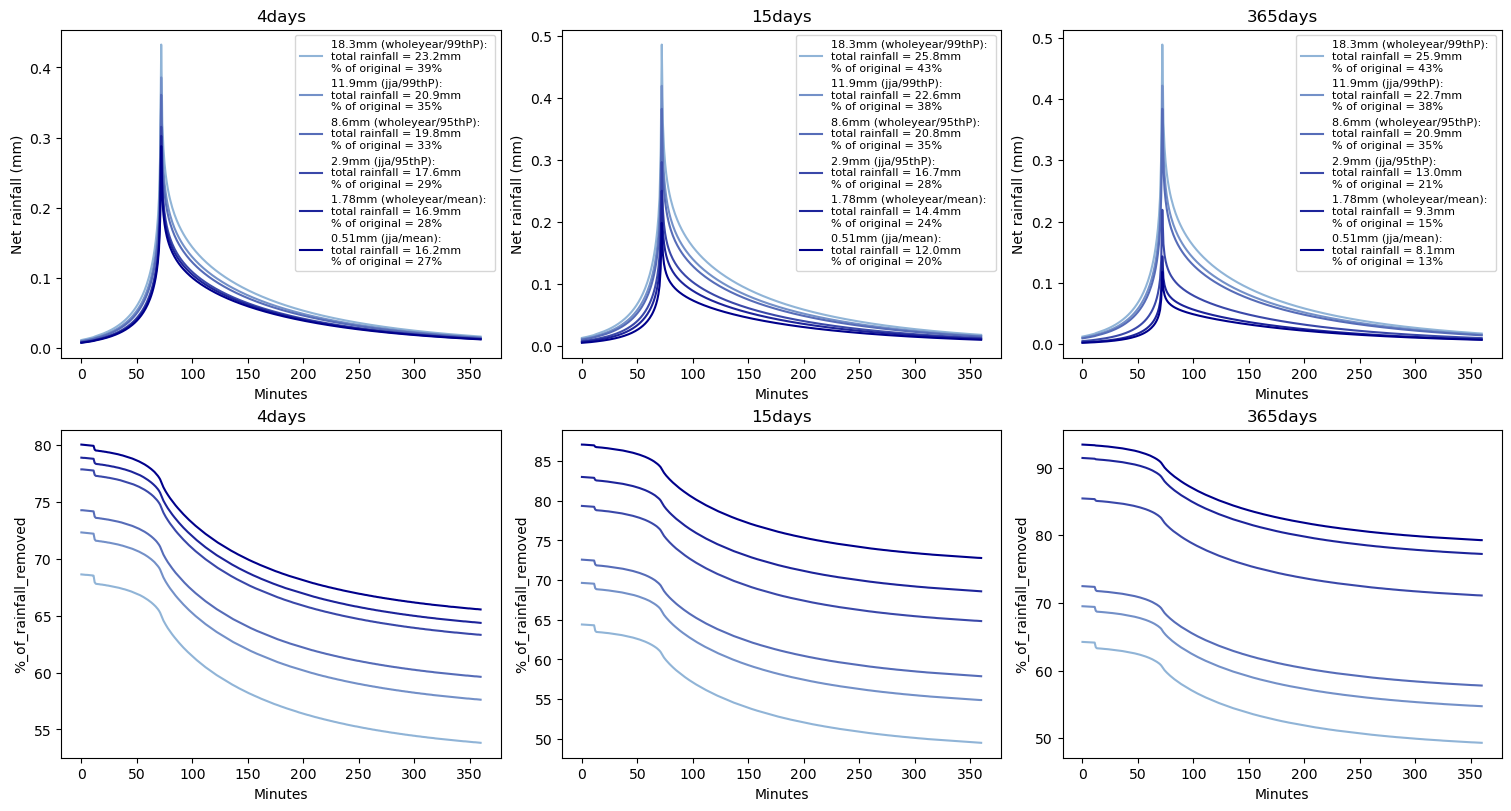

In [39]:
cols = ['#90b4d7', '#7390c8', '#566cb8', '#3a48a9', '#1d249a', '#00008b']
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize =(15,8), constrained_layout=True)
# 4 days

make_comparison_plot_ver2(ax[0,0], ['wholeyear/99thP_4days', 'jja/99thP_4days','wholeyear/95thP_4days','jja/95thP_4days',   'wholeyear/mean_4days',  'jja/mean_4days', ],
                          cols,dict_of_values, False)
# 15 Days
make_comparison_plot_ver2(ax[0,1], ['wholeyear/99thP_15days', 'jja/99thP_15days','wholeyear/95thP_15days','jja/95thP_15days',   'wholeyear/mean_15days',  'jja/mean_15days', ],
                            cols,dict_of_values, False)
# 365 days
make_comparison_plot_ver2(ax[0,2], ['wholeyear/99thP_365days', 'jja/99thP_365days','wholeyear/95thP_365days','jja/95thP_365days',   'wholeyear/mean_365days',  'jja/mean_365days', ],
                          cols,dict_of_values, False)

# 4 days
make_comparison_plot_ver2(ax[1,0], ['wholeyear/99thP_4days', 'jja/99thP_4days','wholeyear/95thP_4days','jja/95thP_4days',   'wholeyear/mean_4days',  'jja/mean_4days', ],
                          cols,dict_of_values, False, plot_losses=True)
# 15 Days
make_comparison_plot_ver2(ax[1,1], ['wholeyear/99thP_15days', 'jja/99thP_15days','wholeyear/95thP_15days','jja/95thP_15days',   'wholeyear/mean_15days',  'jja/mean_15days', ],
                            cols,dict_of_values, False, plot_losses=True)
# 365 days
make_comparison_plot_ver2(ax[1,2], ['wholeyear/99thP_365days', 'jja/99thP_365days','wholeyear/95thP_365days','jja/95thP_365days',   'wholeyear/mean_365days',  'jja/mean_365days', ],
                          cols,dict_of_values, False, plot_losses=True)

In [30]:
# cols = ['#0055aa', '#00aad5', '#00ffff']#, '#60c060', '#309230', '#006400']
# timeperiod = 'jja'
# fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize =(15,6), sharey= 'row', sharex=True)
# # fig.suptitle("JJA antecedent conditions", y=1.01, fontsize=22)
# make_plot(ax[0,0], ['99thP_4days', '99thP_15days', '99thP_365days'],cols, timeperiod,'stat', False)
# make_plot(ax[0,1], ['95thP_4days', '95thP_15days', '95thP_365days'],cols, timeperiod,'stat', False)
# make_plot(ax[0,2], [ 'mean_4days', 'mean_15days', 'mean_365days'], cols,timeperiod,'stat', False)
# make_plot(ax[0,3], ['88thP_4days', '88thP_15days', '88thP_365days'],cols, timeperiod,'stat', False)

# make_plot(ax[1,0], ['99thP_4days', '99thP_15days', '99thP_365days'],cols,timeperiod, False, 'stat',plot_losses=True, legend=False)
# make_plot(ax[1,1], ['95thP_4days', '95thP_15days', '95thP_365days'],cols,timeperiod, False,'stat', plot_losses=True, legend=False)
# make_plot(ax[1,2], [ 'mean_4days', 'mean_15days', 'mean_365days'], cols,timeperiod,False, 'stat',plot_losses=True, legend=False)
# make_plot(ax[1,3], ['88thP_4days', '88thP_15days', '88thP_365days'], cols,timeperiod,False,'stat', plot_losses=True, legend=False)

#### Considering the impact of the number of days of antecedent conditions supplied

In [29]:
# cols = ['#248624', '#48a948', '#6ccb6c', '#90ee90']
# fig, ax = plt.subplots(nrows=2, ncols = 3, figsize =(15,6), sharey= 'row')
# make_plot(ax[0,0], ['99thP_4days', '95thP_4days','mean_4days', '88thP_4days'],cols, timeperiod,'n_days',False)
# make_plot(ax[0,1], ['99thP_15days', '95thP_15days','mean_15days', '88thP_15days'],cols, timeperiod, 'n_days',False)
# make_plot(ax[0,2], ['99thP_365days', '95thP_365days','mean_365days', '88thP_365days'], cols,timeperiod, 'n_days',False)

# make_plot(ax[1,0], ['99thP_4days', '95thP_4days','mean_4days', '88thP_4days'], cols,timeperiod,'n_days', False, plot_losses=True, legend=False)
# make_plot(ax[1,1], ['99thP_15days', '95thP_15days','mean_15days', '88thP_15days'], cols,timeperiod, 'n_days',False, plot_losses=True, legend=False)
# make_plot(ax[1,2], ['99thP_365days', '95thP_365days','mean_365days', '88thP_365days'], cols,timeperiod, 'n_days',False, plot_losses=True, legend=False)

### Whole year

In [28]:
# cols = ['#0055aa', '#00aad5', '#00ffff']#, '#60c060', '#309230', '#006400']
# timeperiod = 'wholeyear'
# fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize =(15,6), sharey= 'row', sharex=True)
# # fig.suptitle("JJA antecedent conditions", y=1.01, fontsize=22)
# make_plot(ax[0,0], ['99thP_4days', '99thP_15days', '99thP_365days'],cols, timeperiod,'stat', False)
# make_plot(ax[0,1], ['95thP_4days', '95thP_15days', '95thP_365days'],cols, timeperiod,'stat', False)
# make_plot(ax[0,2],   [ 'mean_4days', 'mean_15days', 'mean_365days'],cols, timeperiod,'stat', False)
# make_plot(ax[0,3], ['88thP_4days', '88thP_15days', '88thP_365days'],cols, timeperiod,'stat', False)
# cols,
# make_plot(ax[1,0], ['99thP_4days', '99thP_15days', '99thP_365days'],cols,timeperiod, False, 'stat',plot_losses=True, legend=False)
# make_plot(ax[1,1], ['95thP_4days', '95thP_15days', '95thP_365days'],cols,timeperiod, False,'stat', plot_losses=True, legend=False)
# make_plot(ax[1,2],   [ 'mean_4days', 'mean_15days', 'mean_365days'],cols, timeperiod,False, 'stat',plot_losses=True, legend=False)
# make_plot(ax[1,3], ['88thP_4days', '88thP_15days', '88thP_365days'],cols, timeperiod,False,'stat', plot_losses=True, legend=False)

In [27]:
# timeperiod = 'wholeyear'
# cols = ['#248624', '#48a948', '#6ccb6c', '#90ee90']
# fig, ax = plt.subplots(nrows=2, ncols = 3, figsize =(15,6), sharey= 'row')
# make_plot(ax[0,0], ['99thP_4days', '95thP_4days','mean_4days', '88thP_4days'],cols,timeperiod,'n_days',False)
# make_plot(ax[0,1], ['99thP_15days', '95thP_15days','mean_15days', '88thP_15days'], cols,timeperiod, 'n_days',False)
# make_plot(ax[0,2], ['99thP_365days', '95thP_365days','mean_365days', '88thP_365days'], cols,timeperiod, 'n_days',False)

# make_plot(ax[1,0], ['99thP_4days', '95thP_4days','mean_4days', '88thP_4days'], cols,timeperiod,'n_days', False, plot_losses=True, legend=False)
# make_plot(ax[1,1], ['99thP_15days', '95thP_15days','mean_15days', '88thP_15days'], cols,timeperiod, 'n_days',False, plot_losses=True, legend=False)
# make_plot(ax[1,2], ['99thP_365days', '95thP_365days','mean_365days', '88thP_365days'],cols,timeperiod, 'n_days',False, plot_losses=True, legend=False)

### Compare whole year and JJA

In [8]:
# cols = ['darkred', 'navy']

# fig, ax = plt.subplots(nrows=3, ncols = 4, figsize =(15,9), sharey= True, constrained_layout=True)
# make_comparison_plot(ax[0,0], ['wholeyear/99thP_4days', 'jja/99thP_4days', ],cols, False)
# make_comparison_plot(ax[0,1], ['wholeyear/95thP_4days', 'jja/95thP_4days', ],cols, False)
# make_comparison_plot(ax[0,2],   ['wholeyear/mean_4days', 'jja/mean_4days', ],cols, False)
# make_comparison_plot(ax[0,3], ['wholeyear/88thP_4days', 'jja/88thP_4days', ],cols, False)
# cols,
# make_comparison_plot(ax[1,0], ['wholeyear/99thP_15days', 'jja/99thP_15days', ],cols,False)
# make_comparison_plot(ax[1,1], ['wholeyear/95thP_15days', 'jja/95thP_15days', ],cols,False)
# make_comparison_plot(ax[1,2],   ['wholeyear/mean_15days', 'jja/mean_15days', ],cols,False)
# make_comparison_plot(ax[1,3], ['wholeyear/88thP_15days', 'jja/88thP_15days', ],cols,False)

# make_comparison_plot(ax[2,0], ['wholeyear/99thP_365days', 'jja/99thP_365days', ], cols, False)
# make_comparison_plot(ax[2,1], ['wholeyear/95thP_365days', 'jja/95thP_365days', ], cols, False)
# make_comparison_plot(ax[2,2],   ['wholeyear/mean_365days', 'jja/mean_365days', ], cols, False)
# make_comparison_plot(ax[2,3], ['wholeyear/88thP_365days', 'jja/88thP_365days', ], cols, False)